In [8]:
import random

In [9]:
class Cues:
    def __init__(self, data):
        self.sentences = data[0]
        self.cues = data[1]
        self.num_sentences = len(data[0])
class Scopes:
    def __init__(self, data):
        self.sentences = data[0]
        self.cues = data[1]
        self.scopes = data[2]
        self.pos = data[3]
        self.num_sentences = len(data[0])

In [10]:
def starsem(f_path, cue_sents_only=False, frac_no_cue_sents = 1.0):
            raw_data = open(f_path)
            sentence = []
            labels = []
            label = []
            scope_sents = []
            scope_pos =[]
            data_scope = []
            scope = []
            scope_cues = []
            data = []
            cue_only_data = []
            POS = []
            
            for line in raw_data:
                label = []
                sentence = []
                POS = []
                tokens = line.strip().split()
                if len(tokens)==8: #This line has no cues
                        sentence.append(tokens[3])
                        POS.append(tokens[5])
                        label.append(3) #Not a cue
                        for line in raw_data:
                            tokens = line.strip().split()
                            if len(tokens)==0:
                                break
                            else:
                                sentence.append(tokens[3])
                                POS.append(tokens[5])
                                label.append(3)
                        cue_only_data.append([sentence, label, POS])
                        
                    
                else: #The line has 1 or more cues
                    num_cues = (len(tokens)-7)//3
                    #cue_count+=num_cues
                    scope = [[] for i in range(num_cues)]
                    label = [[],[]] #First list is the real labels, second list is to modify if it is a multi-word cue.
                    label[0].append(3) #Generally not a cue, if it is will be set ahead.
                    label[1].append(-1) #Since not a cue, for now.
                    for i in range(num_cues):
                        if tokens[7+3*i] != '_': #Cue field is active
                            if tokens[8+3*i] != '_': #Check for affix
                                label[0][-1] = 0 #Affix
                                affix_list.append(tokens[7+3*i])
                                label[1][-1] = i #Cue number
                                #sentence.append(tokens[7+3*i])
                                #new_word = '##'+tokens[8+3*i]
                            else:
                                label[0][-1] = 1 #Maybe a normal or multiword cue. The next few words will determine which.
                                label[1][-1] = i #Which cue field, for multiword cue altering.
                                
                        if tokens[8+3*i] != '_':
                            scope[i].append(1)
                        else:
                            scope[i].append(0)
                    sentence.append(tokens[3])
                    POS.append(tokens[5])
                    for line in raw_data:
                        tokens = line.strip().split()
                        if len(tokens)==0:
                            break
                        else:
                            sentence.append(tokens[3])
                            POS.append(tokens[5])
                            label[0].append(3) #Generally not a cue, if it is will be set ahead.
                            label[1].append(-1) #Since not a cue, for now.   
                            for i in range(num_cues):
                                if tokens[7+3*i] != '_': #Cue field is active
                                    if tokens[8+3*i] != '_': #Check for affix
                                        label[0][-1] = 0 #Affix
                                        label[1][-1] = i #Cue number
                                    else:
                                        label[0][-1] = 1 #Maybe a normal or multiword cue. The next few words will determine which.
                                        label[1][-1] = i #Which cue field, for multiword cue altering.
                                if tokens[8+3*i] != '_':
                                    scope[i].append(1)
                                else:
                                    scope[i].append(0)
                    for i in range(num_cues):
                        indices = [index for index,j in enumerate(label[1]) if i==j]
                        count = len(indices)
                        if count>1:
                            for j in indices:
                                label[0][j] = 2
                    for i in range(num_cues):
                        sc = []
                        for a,b in zip(label[0],label[1]):
                            if i==b:
                                sc.append(a)
                            else:
                                sc.append(3)
                        scope_cues.append(sc)
                        scope_sents.append(sentence)
                        scope_pos.append(POS)
                        data_scope.append(scope[i])
                    labels.append(label[0])
                    data.append(sentence)
            cue_only_samples = random.sample(cue_only_data, k=int(frac_no_cue_sents*len(cue_only_data)))
            cue_only_sents = [i[0] for i in cue_only_samples]
            cue_only_cues = [i[1] for i in cue_only_samples]
            starsem_cues = (data+cue_only_sents,labels+cue_only_cues)
            starsem_scopes = (scope_sents, scope_cues, data_scope, scope_pos)
            return [starsem_cues, starsem_scopes]

In [11]:
    ret_val = starsem(r'..\starsem-st-2012-data\cd-sco\corpus\training\SEM-2012-SharedTask-CD-SCO-training-09032012.txt', frac_no_cue_sents=1.0)
    cue_data = Cues(ret_val[0])
    scope_data = Scopes(ret_val[1])

In [12]:
print(dict(zip(scope_data.sentences[28],scope_data.scopes[28])))

{'The': 1, 'dog': 1, "'s": 1, 'jaw': 1, ',': 0, 'as': 0, 'shown': 0, 'in': 0, 'the': 0, 'space': 0, 'between': 0, 'these': 0, 'marks': 0, 'is': 1, 'too': 0, 'broad': 1, 'my': 0, 'opinion': 0, 'for': 1, 'a': 1, 'terrier': 0, 'and': 0, 'not': 0, 'enough': 1, 'mastiff': 1, '.': 0}


In [13]:
print(dict(zip(scope_data.sentences[73],scope_data.cues[73])))

{'He': 3, 'declares': 3, 'that': 3, 'he': 3, 'heard': 3, 'cries': 3, 'but': 3, 'is': 3, 'unable': 0, 'to': 3, 'state': 3, 'from': 3, 'what': 3, 'direction': 3, 'they': 3, 'came': 3, '.': 3}


In [14]:
# for sents,poss,scopes in zip(scope_data.sentences,scope_data.pos,scope_data.scopes):
#     assert len(sents) == len(poss) == len(scopes)
#     for token,pos_tag,scope in zip(sents,poss,scopes):
#         print(token,pos_tag,scope)

In [15]:
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling1D,Conv1D, Embedding,Input,Dense,GRU,LSTM,Concatenate,Dropout,Activation,Add, Masking, Concatenate, Dot, RepeatVector, Permute, Multiply
from tensorflow.keras.models import Model
np.random.seed(42)

In [16]:
train_test_cutoff = int(.80 * len(scope_data.sentences)) 
training_sentences = scope_data.sentences[:train_test_cutoff]
testing_sentences = scope_data.sentences[train_test_cutoff:]
training_POS = scope_data.pos[:train_test_cutoff]
testing_POS = scope_data.pos[train_test_cutoff:]
training_scope = scope_data.scopes[:train_test_cutoff]
testing_scope = scope_data.scopes[train_test_cutoff:]
 
# train_val_cutoff = int(.25 * len(training_sentences))
# validation_sentences = training_sentences[:train_val_cutoff]
# training_sentences = training_sentences[train_val_cutoff:]
# validation_POS = training_POS[:train_val_cutoff]
# training_POS = training_POS[train_val_cutoff:]
# validation_scope = training_scope[:train_val_cutoff]
# training_scope = training_scope[train_val_cutoff:]

In [17]:
words, tags = set([]), set([])
 
for s in training_sentences:
    for w in s:
        words.add(w.lower())
for ts in training_POS:
    for t in ts:
        tags.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0  # The special value used to padding

In [18]:
train_sentences_X, test_sentences_X, train_tags_y, test_tags_y = [], [], [], []
 
for s in training_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in testing_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in training_POS:
    train_tags_y.append([tag2index[t] for t in s])

for s in testing_POS:
    test_tags_y.append([tag2index[t] for t in s])

print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])

[171, 718, 2191, 1661, 413, 1470, 775, 109, 2063, 1247, 1827, 547, 1661, 1635, 1372, 1312, 1058, 1551, 549, 157, 120, 1470, 145, 275, 1142, 1661, 1470, 2211, 2146, 1827, 1910, 400, 1442]
[1247, 1741, 1661, 231, 1802, 1871, 1058, 133, 835, 1311, 1118, 838, 1, 1675, 983, 346, 371, 133, 1, 1442, 1804]
[12, 12, 12, 32, 5, 31, 29, 29, 40, 18, 1, 7, 32, 9, 18, 1, 29, 40, 7, 37, 28, 31, 29, 1, 35, 32, 31, 27, 18, 1, 35, 35, 4]
[18, 35, 32, 18, 28, 31, 29, 27, 35, 28, 38, 29, 40, 18, 28, 14, 9, 27, 35, 4, 16]


In [19]:
len(train_sentences_X[0])

33

In [20]:
MAX_LENGTH = len(max(train_sentences_X, key=len))
print(MAX_LENGTH)

83


In [21]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')

train_scope_y = pad_sequences(training_scope, maxlen=MAX_LENGTH, padding='post')
test_scope_y = pad_sequences(testing_scope, maxlen=MAX_LENGTH, padding='post')
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])
print(train_scope_y[0])
print(test_scope_y[0])

[ 171  718 2191 1661  413 1470  775  109 2063 1247 1827  547 1661 1635
 1372 1312 1058 1551  549  157  120 1470  145  275 1142 1661 1470 2211
 2146 1827 1910  400 1442    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
[1247 1741 1661  231 1802 1871 1058  133  835 1311 1118  838    1 1675
  983  346  371  133    1 1442 1804    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
[12 12 12 32  5 31 29 29 40 18  1  7 32  9 18  1 29 40  7 37 28 31 29  1
 35 32 31 27 18  1 35 35  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 

In [22]:
num_classes1=np.max(np.concatenate((train_tags_y,test_tags_y),axis=None))+1
num_classes2=np.max(np.concatenate((train_scope_y,test_scope_y),axis=None))+1

y1_train = keras.utils.to_categorical(train_tags_y, num_classes1)
y1_test = keras.utils.to_categorical(test_tags_y, num_classes1)
y2_train = keras.utils.to_categorical(train_scope_y, num_classes2)
y2_test = keras.utils.to_categorical(test_scope_y, num_classes2)

In [23]:
num_words=len(word2index)
embedding_vector_length = 128
max_length=MAX_LENGTH
batch_size=32
epochs=50

In [24]:
inputsA=Input(shape=(max_length,))
x2=Embedding(num_words, embedding_vector_length, input_length=max_length)(inputsA)
x1=Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(x2)
x1=LSTM(100,return_sequences = True)(x1)

inputsB=Input(shape=(max_length,))
x2=Embedding(num_words, embedding_vector_length)(inputsB)
x2=Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x2)
x2=LSTM(100,return_sequences = True)(x2)

shared_lstm = LSTM(64,return_sequences = True)

encoded_1 = shared_lstm(x1)
encoded_2 = shared_lstm(x2)

merged = Concatenate(axis=-1)([encoded_1, encoded_2])
# merged=MaxPooling1D(pool_size=2)(merged)
y1=Dense(num_classes1, activation='softmax')(merged)
y2=Dense(num_classes2, activation='softmax')(merged)

model=Model(inputs=[inputsA, inputsB],outputs=[y1,y2])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
                  metrics=['categorical_accuracy'])

In [56]:
inputsA=Input(shape=(max_length,))
x1=Embedding(num_words, embedding_vector_length, input_length=max_length)(inputsA)
x1=Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(x1)
x1=LSTM(100,return_sequences = True)(x1)

inputsB=Input(shape=(max_length,))
x2=Embedding(num_words, embedding_vector_length)(inputsB)
x2=Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x2)
x2=LSTM(100,return_sequences = True)(x2)

shared_lstm = LSTM(64,return_sequences = True)

encoded_1 = shared_lstm(x1)
encoded_2 = shared_lstm(x2)

# merged = Concatenate(axis=-1)([encoded_1, encoded_2])
# merged=MaxPooling1D(pool_size=2)(merged)
y1=Dense(num_classes1, activation='softmax')(encoded_1)
y2=Dense(num_classes2, activation='softmax')(encoded_2)

model1 = Model(inputs=[inputsA],outputs=[y1])
model2 = Model(inputs=[inputsB],outputs=[y2])

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
                  metrics=['categorical_accuracy'])
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
                  metrics=['categorical_accuracy'])

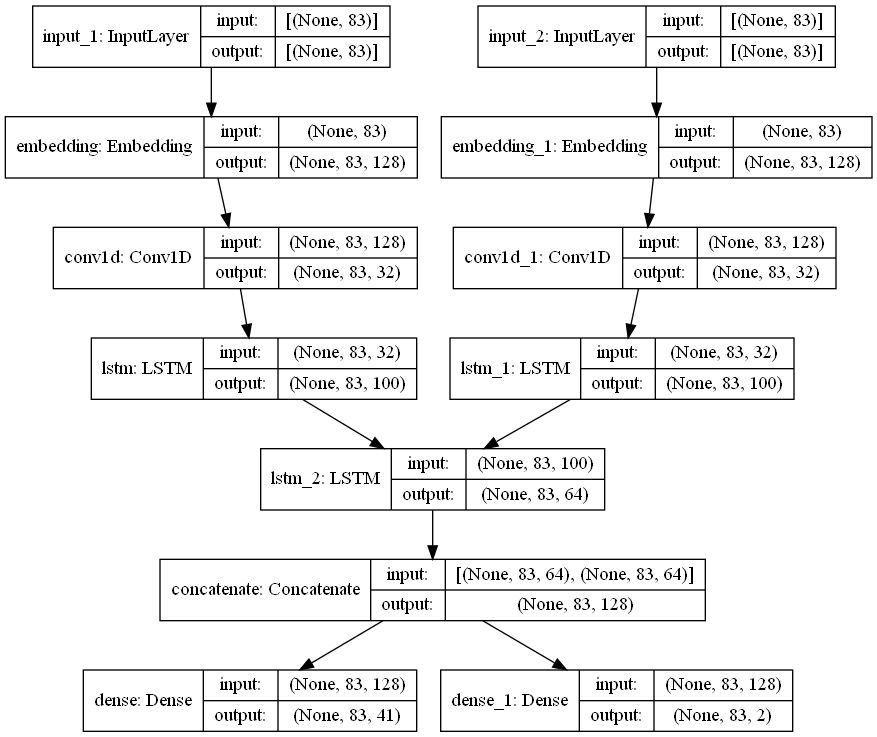

In [26]:
from keras.utils.vis_utils import plot_model
import pydot
import graphviz
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
# %debug
history = model.fit([train_sentences_X,train_sentences_X], [y1_train,y2_train],
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split=0.1)

Epoch 1/50
23/23 [==============================] - 2s 99ms/step - loss: 1.1875 - dense_4_loss: 1.0087 - dense_5_loss: 0.1788 - dense_4_categorical_accuracy: 0.7258 - dense_5_categorical_accuracy: 0.9186 - val_loss: 1.1680 - val_dense_4_loss: 0.9792 - val_dense_5_loss: 0.1888 - val_dense_4_categorical_accuracy: 0.7203 - val_dense_5_categorical_accuracy: 0.8990
Epoch 2/50
23/23 [==============================] - 2s 95ms/step - loss: 1.1025 - dense_4_loss: 0.9366 - dense_5_loss: 0.1658 - dense_4_categorical_accuracy: 0.7382 - dense_5_categorical_accuracy: 0.9186 - val_loss: 1.1180 - val_dense_4_loss: 0.9340 - val_dense_5_loss: 0.1840 - val_dense_4_categorical_accuracy: 0.7455 - val_dense_5_categorical_accuracy: 0.8990
Epoch 3/50
23/23 [==============================] - 2s 99ms/step - loss: 1.0573 - dense_4_loss: 0.9028 - dense_5_loss: 0.1546 - dense_4_categorical_accuracy: 0.7506 - dense_5_categorical_accuracy: 0.9207 - val_loss: 1.0846 - val_dense_4_loss: 0.9056 - val_dense_5_loss: 0.17

23/23 [==============================] - 3s 139ms/step - loss: 0.0626 - dense_4_loss: 0.0155 - dense_5_loss: 0.0470 - dense_4_categorical_accuracy: 0.9983 - dense_5_categorical_accuracy: 0.9776 - val_loss: 0.3538 - val_dense_4_loss: 0.1404 - val_dense_5_loss: 0.2133 - val_dense_4_categorical_accuracy: 0.9689 - val_dense_5_categorical_accuracy: 0.9250
Epoch 46/50
23/23 [==============================] - 3s 127ms/step - loss: 0.0563 - dense_4_loss: 0.0148 - dense_5_loss: 0.0415 - dense_4_categorical_accuracy: 0.9983 - dense_5_categorical_accuracy: 0.9795 - val_loss: 0.3765 - val_dense_4_loss: 0.1394 - val_dense_5_loss: 0.2371 - val_dense_4_categorical_accuracy: 0.9684 - val_dense_5_categorical_accuracy: 0.9251
Epoch 47/50
23/23 [==============================] - 3s 125ms/step - loss: 0.0544 - dense_4_loss: 0.0138 - dense_5_loss: 0.0406 - dense_4_categorical_accuracy: 0.9983 - dense_5_categorical_accuracy: 0.9794 - val_loss: 0.3625 - val_dense_4_loss: 0.1413 - val_dense_5_loss: 0.2212 - v

In [41]:
score = model.evaluate([np.array(test_sentences_X),test_sentences_X], [np.array(y1_test),y2_test],
               batch_size=1, verbose=1)

197/197 [==============================] - 2s 8ms/step - loss: 0.3208 - dense_4_loss: 0.1287 - dense_5_loss: 0.1921 - dense_4_categorical_accuracy: 0.9727 - dense_5_categorical_accuracy: 0.9414


In [35]:
out = model.predict([train_sentences_X[0],train_sentences_X[0]],batch_size =1)

In [36]:
import pandas as pd
index2tag = {value : key for (key, value) in tag2index.items()}
index2word = {value : key for (key, value) in word2index.items()}

pred = out[0].argmax(axis = -1)
output = []
sent =[]
for i in pred:
    output.append(index2tag[int(i)])
for i in train_sentences_X[0]:
    sent.append(index2word[int(i)])
pd.DataFrame(zip(training_sentences[0],training_POS[0],output,training_scope[0],out[1].argmax(axis = -1)))

,0,1,2,3,4
0,Mr.,NNP,RB,0,[0]
1,Sherlock,NNP,NN,0,[0]
2,Holmes,NNP,NN,0,[0]
3,",",",",NN,0,[0]
4,who,WP,RB,0,[0]
5,was,VBD,NN,0,[0]
6,usually,RB,NN,0,[0]
7,very,RB,PRP,0,[0]
8,late,JJ,RB,0,[0]
9,in,IN,RB,0,[0]


In [42]:
def f1_scope(y_true, y_pred, level = 'scope'): #This is for gold cue annotation scope, thus the precision is always 1.
    if level == 'token':
        print(f1_score([i for i in j for j in y_true], [i for i in j for j in y_pred]))
    elif level == 'scope':
        tp = 0
        fn = 0
        fp = 0
        for y_t, y_p in zip(y_true, y_pred):
            if y_t == y_p:
                tp+=1
            else:
                fn+=1
        prec = 1
        rec = tp/(tp+fn)
        print(f"Precision: {prec}")
        print(f"Recall: {rec}")
        print(f"F1 Score: {2*prec*rec/(prec+rec)}")

In [47]:
y_pred = model.predict([test_sentences_X,test_sentences_X],batch_size=1)[1]

In [44]:
y2_test.argmax(axis=-1).shape

(197, 83)

In [45]:
f1_scope([j for i in y1_test.argmax(axis=-1) for j in i], [j for i in y_pred.argmax(axis=-1) for j in i], level='scope')

Precision: 1
Recall: 0.9726622224940371
F1 Score: 0.9861416834599287


In [48]:
list(zip(y2_test.argmax(axis=-1), y_pred.argmax(axis=-1)))

[(array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
  array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)),
 (array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
  array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 